In [1]:
#local brain data
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

import SpatialDE

plt.rcParams['figure.figsize']=(8,8)

%load_ext autoreload
%autoreload 2

In [14]:
adata.var_names_make_unique()

sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var['mt'] = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata[:, adata.var['mt']].X.sum(1).A.squeeze()/adata.obs['total_counts']

In [15]:
fig, axs = plt.subplots(1,4, figsize=(15,4))
fig.suptitle('Covariates for filtering')
sb.distplot(adata.obs['total_counts'], kde=False, ax = axs[0])
sb.distplot(adata.obs['total_counts'][adata.obs['total_counts']<10000], kde=False, bins=40, ax = axs[1])
sb.distplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax = axs[2])
sb.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<4000], kde=False, bins=60, ax = axs[3])

In [16]:
sc.pp.filter_cells(adata, min_counts = 1000)
print(f'Number of cells after min count filter: {adata.n_obs}')
sc.pp.filter_cells(adata, max_counts = 40000)
print(f'Number of cells after max count filter: {adata.n_obs}')
adata = adata[adata.obs['mt_frac'] < 0.2]
print(f'Number of cells after MT filter: {adata.n_obs}')
sc.pp.filter_cells(adata, min_genes = 1000)
print(f'Number of cells after gene filter: {adata.n_obs}')
sc.pp.filter_genes(adata, min_cells=10)
print(f'Number of genes after cell filter: {adata.n_vars}')

Number of cells after min count filter: 3280
Number of cells after max count filter: 3267
Number of cells after MT filter: 3267


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 3231
Number of genes after cell filter: 16015


In [17]:
sc.pp.normalize_total(adata, inplace = True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)

In [18]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.umap(adata)
sc.tl.louvain(adata, key_added='clusters')

... storing 'feature_types' as categorical
... storing 'genome' as categorical


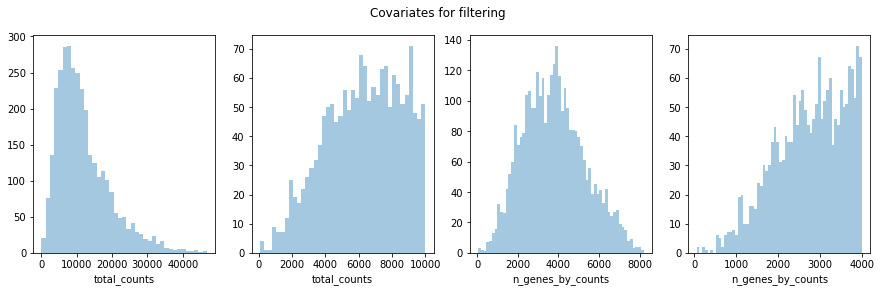

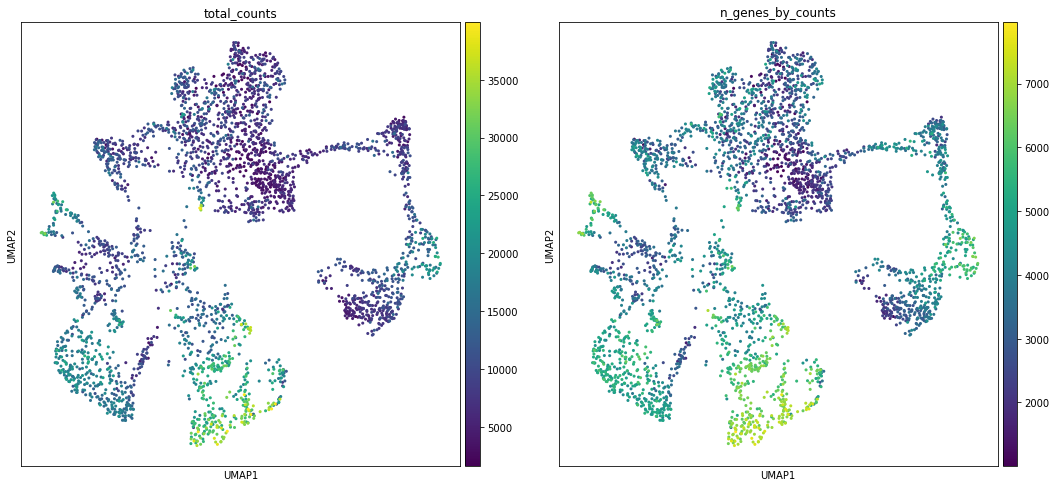

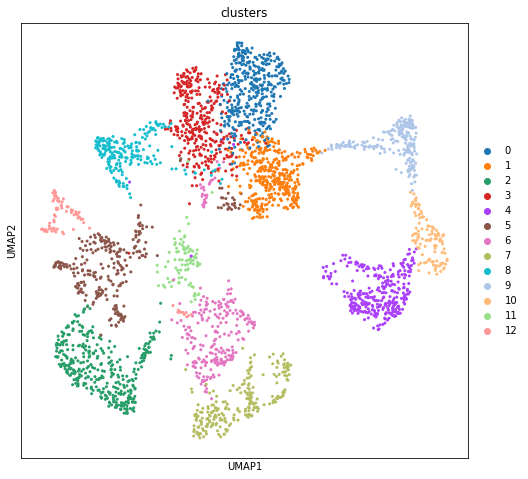

In [19]:
sc.pl.umap(adata, color=['total_counts', 'n_genes_by_counts'])
sc.pl.umap(adata, color='clusters', palette=sc.pl.palettes.default_20)

In [ ]:
sc.pl.spatial(adata, img_key = "hires",color=['total_counts', 'n_genes_by_counts'])

In [ ]:
sc.pl.spatial(adata, img_key = "hires", color="clusters", size=1.5)

In [22]:
sc.tl.rank_genes_groups(adata, "clusters", inplace = True)
sc.pl.rank_genes_groups_heatmap(adata, groups = "4", groupby = "clusters", show = False)

categories: 0, 1, 2, etc.
var_group_labels: 4


In [ ]:
sc.pl.spatial(adata, img_key = "hires", color="Rbfox3")

In [24]:
counts = pd.DataFrame(adata.X.todense(), columns=adata.var_names, index=adata.obs_names)
coord = pd.DataFrame(adata.obsm["X_spatial"], columns=["x_coord", "y_coord"], index = adata.obs_names)

results = SpatialDE.run(coord, counts)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [25]:
results.index = results["g"]
adata.var = pd.concat([adata.var, results.loc[adata.var.index.values,:]], axis = 1)

In [26]:
results.sort_values("qval").head(10)

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
g,,,,,,,,,,,,,,,,,,
Frrs1l,0.249794,4,Frrs1l,459.007121,2.938079,-2456.504937,0.657467,0.089393,SE,3231,0.000018,0.000549,0.001802,4945.332062,-2825.641903,369.136966,0.0,0.0
Cap2,0.227798,4,Cap2,865.357789,3.150269,-1958.034694,0.401318,0.060421,SE,3231,0.000107,0.003541,0.003584,3948.391576,-2293.415025,335.380331,0.0,0.0
Ube2m,0.116313,4,Ube2m,459.007121,7.432520,-2809.888089,1.084419,0.058285,SE,3231,0.000020,0.001695,0.001800,5652.098366,-2898.360003,88.471914,0.0,0.0
Rps5,0.185860,4,Rps5,459.007121,4.285259,-1989.912989,2.020748,0.101902,SE,3231,0.000015,0.000634,0.001955,4012.148165,-2257.002196,267.089207,0.0,0.0
Peg3,0.196626,4,Peg3,459.007121,3.997070,-2618.653783,0.697762,0.075393,SE,3231,0.000019,0.000770,0.002297,5269.629755,-2817.617418,198.963635,0.0,0.0
Rpl28,0.184182,4,Rpl28,459.007121,4.333211,-1477.433363,2.362950,0.111226,SE,3231,0.000014,0.000617,0.001867,2987.188913,-1724.506234,247.072871,0.0,0.0
Tnnt1,0.639632,4,Tnnt1,459.007121,0.551163,-505.271424,0.159210,0.120514,SE,3231,0.000009,0.000193,0.001753,1042.865035,-2272.608307,1767.336883,0.0,0.0
Gm33489,0.074814,4,Gm33489,865.357789,11.492450,2121.195585,0.019322,0.001337,SE,3231,0.000029,0.005105,0.002896,-4210.068982,2005.872131,115.323454,0.0,0.0
Dalrd3,0.076249,4,Dalrd3,865.357789,11.258749,-2070.543289,0.407266,0.019036,SE,3231,0.000027,0.004576,0.002929,4173.408765,-2163.001892,92.458603,0.0,0.0


In [ ]:
sc.pl.spatial(adata,img_key = "hires",color = ["Pcp2", "Gng13", "Rbfox3"], alpha = 0.7)

In [ ]:
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black', marker='>')

plt.axhline(0.05, c='black', lw=1, ls='--');
          
plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');
plt.ylim(bottom=1)
plt.ylim(top=0.0000000000000001)
#this next bit is for labeling a subset of the spots
for i, txt in enumerate(results['g']):
    if results['FSV'][i] > 0.7:
        plt.annotate(txt, (results['FSV'][i], results['qval'][i])) 
plt.show()

In [ ]:
for i, txt in enumerate(results['g']):
    if results['FSV'][i] > 0.7:
        #plot the genes that have a FSV > 0.75 (FSV:faction spatial variance)
        sc.pl.spatial(adata,img_key = "hires",color = [txt], alpha = 0.7)